In [1]:
import math
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [2]:
DATASET = "abductivenli"

# Reading the data of all 5 epochs


In [4]:
for i in range(5):
    exec(f"epoch{i} = pd.read_csv('/content/drive/MyDrive/NLP/data/{DATASET}/data_map/epoch_{i}_predictions.csv')")
    exec(f"epoch{i}['confidence'] = epoch{i}.apply(lambda x: x[str(int(x['label']))],axis=1)")

In [5]:
#Average confidence estimates
avg_confidence = (epoch0['confidence']+epoch1['confidence']+epoch2['confidence']+epoch3['confidence']+epoch4['confidence'])/5

(array([  16.,    7.,   12.,   13.,   19.,   38.,  152.,  295.,  644.,
        3804.]),
 array([0.47956501, 0.53160673, 0.58364845, 0.63569017, 0.68773189,
        0.73977361, 0.79181533, 0.84385705, 0.89589877, 0.94794049,
        0.99998221]),
 <a list of 10 Patch objects>)

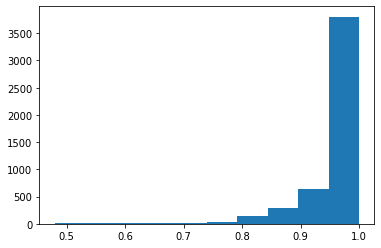

In [6]:
plt.hist(avg_confidence)

In [7]:
#Calculating the variance
variance = []
for i in range(len(epoch0)):
    variance.append(numpy.var([epoch0['confidence'][i],epoch1['confidence'][i],epoch2['confidence'][i],epoch3['confidence'][i],epoch4['confidence'][i]]))

    

numpy.var([epoch0['confidence'][0],epoch1['confidence'][0],epoch2['confidence'][0],epoch3['confidence'][0],epoch4['confidence'][0]])

0.0026318903554852103

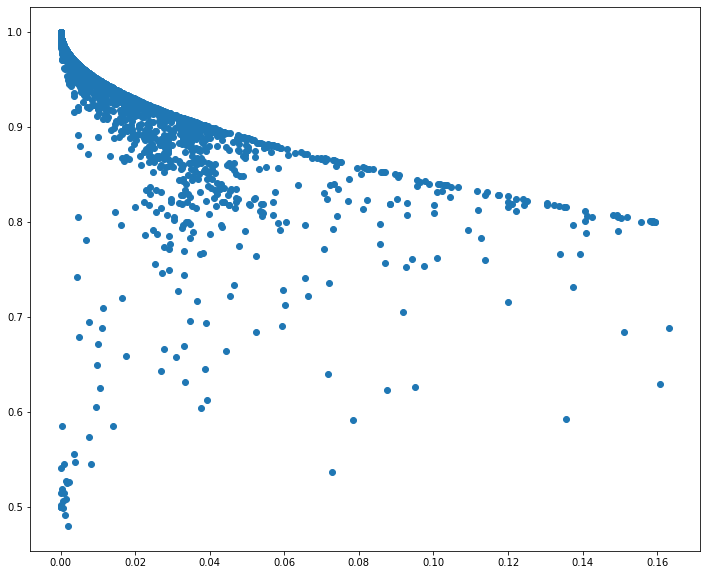

In [8]:
plt.figure(figsize=(12,10))
plt.scatter(variance,avg_confidence)

In [9]:
train = pd.read_csv(f'/content/drive/MyDrive/NLP/data/{DATASET}/train.csv')

In [10]:
train = train.iloc[:,1:]

In [11]:
train['avg_confidence'] = avg_confidence
train['variance'] = variance
train.sort_values('avg_confidence',ignore_index=True,inplace=True,ascending=False)

In [12]:
train

,story_id,obs1,obs2,hyp1,hyp2,labels,avg_confidence,variance
0,0108a640-f210-42fd-84e9-fd9dda5d7a90-1,Henry was standing near the pool side.,All of his belongings became soaked.,Henry never fell in.,Henry accidentally fell in.,1,0.999982,1.252700e-09
1,03f785e5-73e7-4860-bcd5-2270800f72bb-1,Anna was hiking in the hills behind her home.,Anna had to return home for treatment.,Anna fell and hurt her hand badly.,Anna fell and never hurt her badly.,0,0.999980,1.314689e-09
2,041c9cd6-3351-4287-bf7d-56e1b88083412,Francis has always looked forward to learning ...,Francis decides he would rather take public tr...,Francis got into an accident.,Francis learned quickly and never got into an ...,0,0.999979,1.783920e-09
3,041399bb-cd42-4cda-b36b-1917f222c0ba2,"In the autumn, Susan planted some flower seeds...","Soon, Susan had a beautiful garden.",The flowers came up and Susan was pleased.,and didn't win it.,0,0.999978,1.807794e-09
4,058b86e8-a6cb-4927-a363-cbe011af4832-1,Esther was only thirty years old.,They both retired to their respective homes at...,Esther got in a fight with a neighbor.,Ester never fought with a neighbor.,0,0.999978,1.963404e-09
...,...,...,...,...,...,...,...,...
4995,027b09d9-14af-4a87-89b3-6cd9229d24da-1,Saul was new to the neighborhood.,Now his son can play in a clean park.,He decided to clean up the neighborhood park s...,he decided to clean up the neighborhood park s...,1,0.500000,0.000000e+00
4996,0604047e-5ff3-4c12-81e6-5fa8d74f6092-1,Abby and Beck always read before bed.,"On the way up, they woke up, this is the last ...","Abby and Beck's mother read to them, but they ...","Abby and Beck's mother read to them, but they ...",1,0.500000,0.000000e+00
4997,040d1d59-dfab-492e-8f40-1489242d3875-1,Dan was very tired after working out.,Dan woke up revitalized.,Dan decided to get some work done.,Dan decided to get some rest.,1,0.498097,7.104991e-04
4998,047d8c8e-c97e-408f-a29d-2d1650e82a181,Tami decided to attend volleyball tryouts.,Tami made the basketball team.,The players were being picked for volleyball t...,The players had already been picked for volley...,1,0.491543,1.241340e-03


# Create Segments


In [13]:
# segment 1 -> first 2k/2.5k
# segment 2 -> last 2k/2.5k
# segment 3 -> middle 2k/2.5k
# segment 4 -> sample middle and remaining extremes

easy_instances = train[:2_500]
ambi_instances = train[1_250:3_750]
hard_instances = train[2_500:]
mixed_instances = shuffle(pd.concat([ambi_instances.sample(n=2_000), easy_instances[:250], hard_instances[2_250:]]))


In [14]:
easy_instances

,story_id,obs1,obs2,hyp1,hyp2,labels,avg_confidence,variance
0,0108a640-f210-42fd-84e9-fd9dda5d7a90-1,Henry was standing near the pool side.,All of his belongings became soaked.,Henry never fell in.,Henry accidentally fell in.,1,0.999982,1.252700e-09
1,03f785e5-73e7-4860-bcd5-2270800f72bb-1,Anna was hiking in the hills behind her home.,Anna had to return home for treatment.,Anna fell and hurt her hand badly.,Anna fell and never hurt her badly.,0,0.999980,1.314689e-09
2,041c9cd6-3351-4287-bf7d-56e1b88083412,Francis has always looked forward to learning ...,Francis decides he would rather take public tr...,Francis got into an accident.,Francis learned quickly and never got into an ...,0,0.999979,1.783920e-09
3,041399bb-cd42-4cda-b36b-1917f222c0ba2,"In the autumn, Susan planted some flower seeds...","Soon, Susan had a beautiful garden.",The flowers came up and Susan was pleased.,and didn't win it.,0,0.999978,1.807794e-09
4,058b86e8-a6cb-4927-a363-cbe011af4832-1,Esther was only thirty years old.,They both retired to their respective homes at...,Esther got in a fight with a neighbor.,Ester never fought with a neighbor.,0,0.999978,1.963404e-09
...,...,...,...,...,...,...,...,...
2495,056235a2-84cd-4c99-9652-1e07737971431,Bob's stomach was really bothering him after t...,Bob will be careful that he never eats at that...,Bob went to the doctors and found out he had f...,Bob wanted to eat more to make himself feel be...,0,0.993630,8.764119e-05
2496,07a8b675-b6fc-4744-8233-bf80ce05a46d-1,Cole was going outside to play.,His new fingerless gloves fit him perfectly.,He had gotten new shoes that were different.,He had gotten New mittens that were different.,1,0.993627,1.385226e-04
2497,07a8b675-b6fc-4744-8233-bf80ce05a46d-1,Cole was going outside to play.,His new fingerless gloves fit him perfectly.,He had gotten new glasses that were different.,He had gotten New mittens that were different.,1,0.993621,1.355975e-04
2498,03c65c24-2583-40e9-8b84-6decdda111b7-1,Oswald wanted to learn to drive.,Oswald decided to never drive again.,Oswald took a driving lesson and got in an acc...,Oswald took a driving lesson and got hooked.,0,0.993578,8.813277e-05


In [15]:
easy_instances.to_csv(f"/content/drive/MyDrive/NLP/data/{DATASET}/segments/easy/easy.csv")
ambi_instances.to_csv(f"/content/drive/MyDrive/NLP/data/{DATASET}/segments/amb/amb.csv")
hard_instances.to_csv(f"/content/drive/MyDrive/NLP/data/{DATASET}/segments/hard/hard.csv")
mixed_instances.to_csv(f"/content/drive/MyDrive/NLP/data/{DATASET}/segments/mixed/mixed.csv")

In [16]:
df = pd.read_csv(f"/content/drive/MyDrive/NLP/data/{DATASET}/segments/easy/easy.csv")

In [17]:
df

,Unnamed: 0,story_id,obs1,obs2,hyp1,hyp2,labels,avg_confidence,variance
0,0,0108a640-f210-42fd-84e9-fd9dda5d7a90-1,Henry was standing near the pool side.,All of his belongings became soaked.,Henry never fell in.,Henry accidentally fell in.,1,0.999982,1.252700e-09
1,1,03f785e5-73e7-4860-bcd5-2270800f72bb-1,Anna was hiking in the hills behind her home.,Anna had to return home for treatment.,Anna fell and hurt her hand badly.,Anna fell and never hurt her badly.,0,0.999980,1.314689e-09
2,2,041c9cd6-3351-4287-bf7d-56e1b88083412,Francis has always looked forward to learning ...,Francis decides he would rather take public tr...,Francis got into an accident.,Francis learned quickly and never got into an ...,0,0.999979,1.783920e-09
3,3,041399bb-cd42-4cda-b36b-1917f222c0ba2,"In the autumn, Susan planted some flower seeds...","Soon, Susan had a beautiful garden.",The flowers came up and Susan was pleased.,and didn't win it.,0,0.999978,1.807794e-09
4,4,058b86e8-a6cb-4927-a363-cbe011af4832-1,Esther was only thirty years old.,They both retired to their respective homes at...,Esther got in a fight with a neighbor.,Ester never fought with a neighbor.,0,0.999978,1.963404e-09
...,...,...,...,...,...,...,...,...,...
2495,2495,056235a2-84cd-4c99-9652-1e07737971431,Bob's stomach was really bothering him after t...,Bob will be careful that he never eats at that...,Bob went to the doctors and found out he had f...,Bob wanted to eat more to make himself feel be...,0,0.993630,8.764119e-05
2496,2496,07a8b675-b6fc-4744-8233-bf80ce05a46d-1,Cole was going outside to play.,His new fingerless gloves fit him perfectly.,He had gotten new shoes that were different.,He had gotten New mittens that were different.,1,0.993627,1.385226e-04
2497,2497,07a8b675-b6fc-4744-8233-bf80ce05a46d-1,Cole was going outside to play.,His new fingerless gloves fit him perfectly.,He had gotten new glasses that were different.,He had gotten New mittens that were different.,1,0.993621,1.355975e-04
2498,2498,03c65c24-2583-40e9-8b84-6decdda111b7-1,Oswald wanted to learn to drive.,Oswald decided to never drive again.,Oswald took a driving lesson and got in an acc...,Oswald took a driving lesson and got hooked.,0,0.993578,8.813277e-05
